In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

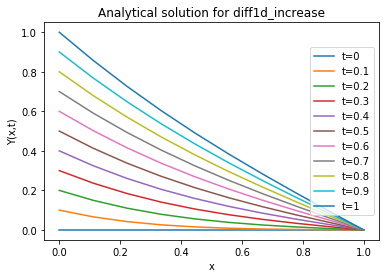

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

1min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.15327312, -0.75705322, -2.20918618, ..., -0.0979278 ,
         1.19296249, -1.26194829],
       [-0.15269934, -0.76200635, -2.19854657, ..., -0.09665342,
         1.18110459, -1.2524814 ],
       [-0.15264811, -0.76135223, -2.20273693, ..., -0.09687792,
         1.18375057, -1.25573772],
       ...,
       [-0.15211986, -0.76523254, -2.1942606 , ..., -0.09996163,
         1.18409151, -1.25157732],
       [-0.15261557, -0.75972685, -2.22147083, ..., -0.09535616,
         1.19053728, -1.26389686],
       [-0.15391447, -0.74599576, -2.21709204, ..., -0.0929952 ,
         1.1991764 , -1.27527853]]), array([1.95150053, 1.95152522, 1.95152645, 1.95152765, 1.9515291 ,
       1.95152918, 1.95152981, 1.95153102, 1.95153219, 1.95153326,
       1.95153346, 1.95153376, 1.95153573, 1.95153592, 1.95154147,
       1.95154222, 1.9515452 , 1.95156397, 1.95156406, 1.9515671 ,
       1.95156815, 1.95157077, 1.95

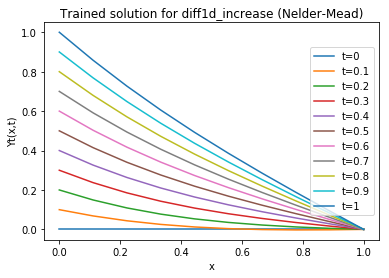

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

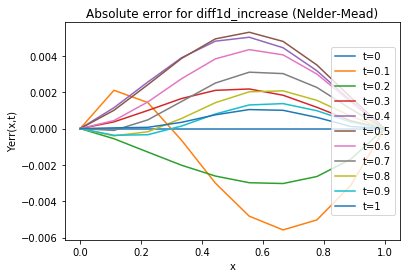

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


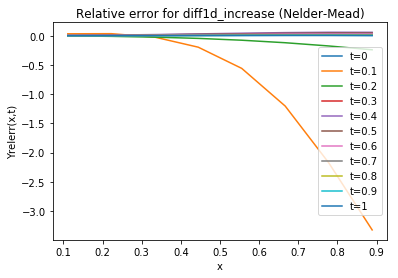

In [9]:
Yt1copy = np.copy(Yt1)
Yacopy = np.copy(Ya)
Yt1sub = Yt1copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr1 = (Yt1sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (maxfev=16000)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

3min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.13555381, -0.04819377, -2.25254595, ...,  0.34434263,
         1.62092229, -1.57987567],
       [ 0.13485437, -0.04908074, -2.25699214, ...,  0.34179415,
         1.61703303, -1.57953071],
       [ 0.13378058, -0.04931582, -2.25990674, ...,  0.34554465,
         1.62714428, -1.59142445],
       ...,
       [ 0.13417301, -0.05200452, -2.26192109, ...,  0.34556114,
         1.61797856, -1.57941854],
       [ 0.13232428, -0.05234243, -2.25996388, ...,  0.34047482,
         1.61187787, -1.57776921],
       [ 0.13154932, -0.05329448, -2.26172755, ...,  0.33978607,
         1.61332888, -1.5787934 ]]), array([1.72978639, 1.72980865, 1.72981074, 1.72981091, 1.72982057,
       1.72982153, 1.72982171, 1.72982547, 1.72982673, 1.72982838,
       1.72982969, 1.7298302 , 1.72983307, 1.72983477, 1.72984026,
       1.72984677, 1.72984866, 1.72985153, 1.72985323, 1.7298547 ,
       1.72985559, 1.72985822, 1.72

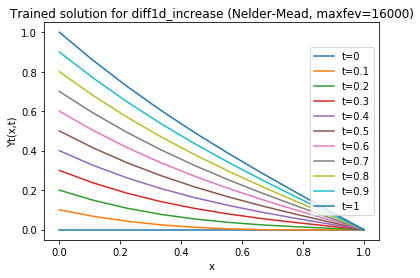

In [11]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

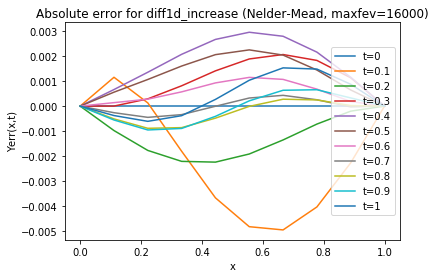

In [12]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


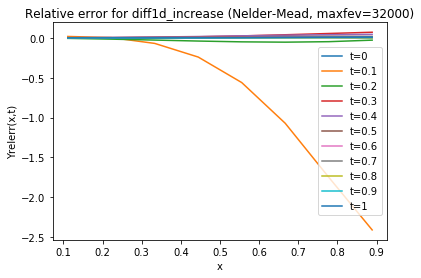

In [23]:
Yt2copy = np.copy(Yt2)
Yacopy = np.copy(Ya)
Yt2sub = Yt2copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr2 = (Yt2sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=32000)

In [16]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

7min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 1.06106525, -0.34102377, -0.30214507, ..., -0.02578201,
         8.91657475, -9.01337759],
       [ 1.06094266, -0.34032246, -0.30336565, ..., -0.02525376,
         8.91128678, -9.0072357 ],
       [ 1.06163005, -0.33871867, -0.30573565, ..., -0.02556522,
         8.91148951, -9.00725513],
       ...,
       [ 1.05865363, -0.33913921, -0.30428793, ..., -0.02521695,
         8.89300221, -8.9880639 ],
       [ 1.05984893, -0.34243615, -0.30007913, ..., -0.02540148,
         8.90081732, -8.99896552],
       [ 1.05998829, -0.33970828, -0.30554646, ..., -0.02625073,
         8.89937207, -8.99388547]]), array([1.55382019, 1.55382915, 1.5538401 , 1.55384279, 1.5538431 ,
       1.55384631, 1.55384775, 1.5538488 , 1.55384961, 1.55384975,
       1.55385091, 1.55385111, 1.55385128, 1.55385195, 1.55385465,
       1.55385629, 1.55385886, 1.55385971, 1.55386044, 1.55386044,
       1.55386092, 1.55386256, 1.55

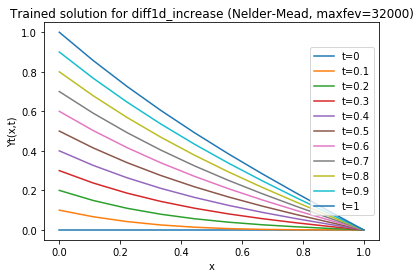

In [17]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

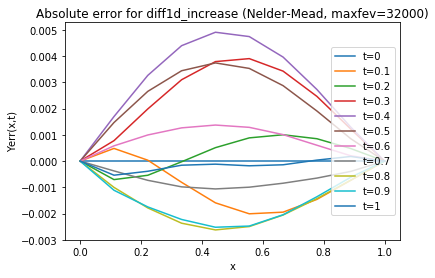

In [18]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


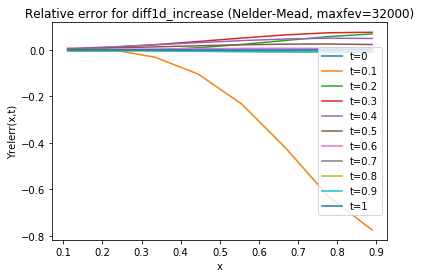

In [21]:
Yt3copy = np.copy(Yt3)
Yacopy = np.copy(Ya)
Yt3sub = Yt3copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr3 = (Yt3sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000)

In [24]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 64000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 1.310803
         Iterations: 46920
         Function evaluations: 54353
13min 56s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[  4.12111276,  -0.44296532,  -1.70909732, ..., -12.09021249,
         23.7656901 , -12.35765723],
       [  4.1211119 ,  -0.4429655 ,  -1.70909827, ..., -12.09020958,
         23.76568426, -12.35765558],
       [  4.12111339,  -0.44296544,  -1.70909737, ..., -12.09021232,
         23.76569366, -12.35766172],
       ...,
       [  4.12111187,  -0.44296529,  -1.70909739, ..., -12.09020688,
         23.76568106, -12.35765555],
       [  4.12111054,  -0.44296518,  -1.70909479, ..., -12.09020752,
         23.76568084, -12.35765252],
       [  4.12111158,  -0.44296588,  -1.70910106, ..., -12.09021365,
         23.76568023, -12.35764802]]), array([1.31080294, 1.31080294, 1.31080294, 1.31080294, 1.31080294,
       1.31080294, 1.31080294, 1.31080294, 1.31080294, 

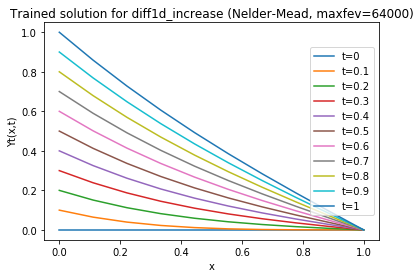

In [25]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

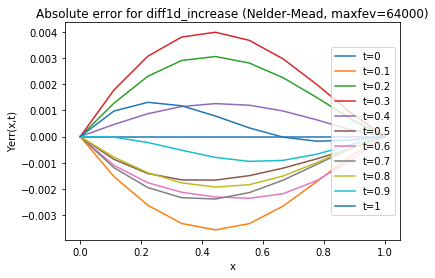

In [26]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


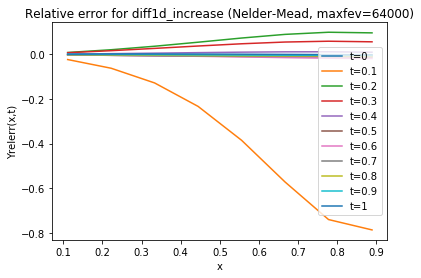

In [27]:
Yt4copy = np.copy(Yt4)
Yacopy = np.copy(Ya)
Yt4sub = Yt4copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr4 = (Yt4sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000, xatol=fatol=1e-6)

In [28]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 64000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

Optimization terminated successfully.
         Current function value: 1.310803
         Iterations: 47208
         Function evaluations: 54927
13min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[  4.12111196,  -0.4429655 ,  -1.70909815, ..., -12.09021163,
         23.76568729, -12.35765628],
       [  4.12111195,  -0.4429655 ,  -1.70909816, ..., -12.09021161,
         23.76568719, -12.3576562 ],
       [  4.12111195,  -0.4429655 ,  -1.70909813, ..., -12.09021155,
         23.76568713, -12.3576562 ],
       ...,
       [  4.12111195,  -0.4429655 ,  -1.70909814, ..., -12.09021157,
         23.7656872 , -12.35765625],
       [  4.12111195,  -0.4429655 ,  -1.70909815, ..., -12.09021157,
         23.76568715, -12.3576562 ],
       [  4.12111196,  -0.4429655 ,  -1.70909815, ..., -12.09021162,
         23.76568725, -12.35765624]]), array([1.31080294, 1.31080294, 1.31080294, 1.31080294, 1.31080294,
       1.31080294, 1.31080294, 1.31080294, 1.31080294, 

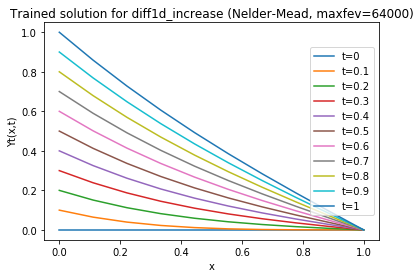

In [29]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

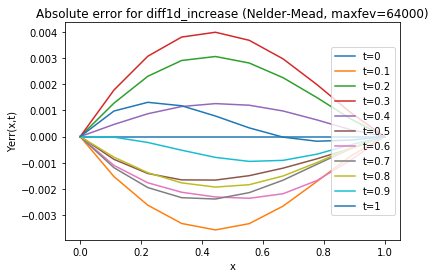

In [30]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


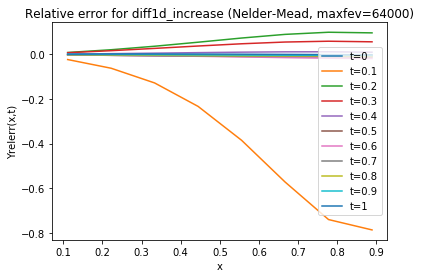

In [31]:
Yt5copy = np.copy(Yt5)
Yacopy = np.copy(Ya)
Yt5sub = Yt5copy[:, 1:-1]   # Skip first and last column
Yasub = Yacopy[:, 1:-1]     # Skip first and last column
Yrelerr5 = (Yt5sub-Yasub)/Yasub
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));